<a href="https://colab.research.google.com/github/daiju0722/Deeplearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kerasを使用したディープラーニングをやってみる
画像認識を行う

## ライブラリの読み込み

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import sys

## 学習済みモデルの読み込み

In [2]:
model = VGG16(weights='imagenet')

553476096/553467096 [==============================] - 6s 0us/step


### 画像判定のための関数

In [3]:
def predict(filename, featuresize):
  img = image.load_img(filename, target_size=(224, 224))
  x = image.image_to_array(img)
  x = np.expend_dims(x, axis=0)
  # 学習モデルで判定を実行
  preds = model.predict(preprocess_input(x))
  results = decode_predictions(preds, top=featuresize)[0]
  return results
  # 関数終わり


### 画像表示のための関数

In [4]:
def showimg(filename, title, i):
  im = Image.open(filename) # 画像ファイルを開く
  im_list = np.array(im) # 画像ビットデータをndarrayにする
  plt.subplot(2, 5, i)
  plt.title(title)
  plt.axis("off")
  plt.imshow(im_list)
  #関数終わり

### Kaggeにある画像データを利用する
https://www.kaggle.com  
犬猫判定用の画像データ  
https://wwwkaggel.com/c/dogs-vs-cats/data  

## 指定されたURLからファイルをダウンロードする

In [5]:
# wgetでwebからファイルをダウンロードする
#GoogleColabでコマンドを実行するときは、先頭に！マークを必ずつけること
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt


--2022-10-04 00:34:28--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 108.177.127.102, 108.177.127.138, 108.177.127.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ehb1rss699h79sl6o8q8cs96bh31k9r1/1664843625000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=9f4bf460-3785-4e4e-8140-d69bb2ba9c07 [following]
--2022-10-04 00:34:28--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ehb1rss699h79sl6o8q8cs96bh31k9r1/1664843625000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=9f4bf460-3785-4e4e-8140-d69bb2ba9c07
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.251

## Colbに自分のGoogleアカウントのドライブをマウントする

In [6]:
# googledpライブを操作するモジュールをimport
from google.colab import drive
# googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


## DLしてきたファイルをマウントしたディレクトリにコピーする

In [7]:
# コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2002LATE"
# すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok=True)
!pwd #今いるディレクトリを表示
# ファイルをコピー
!cp train.zip "/content/drive/My Drive/2002LATE"
# test.zipはいったん使わないのでコピーしない

/content


## GoogleドライブからColabへファイルをコピー

In [8]:
!cp "/content/drive/My Drive/2002LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2002LATE/train.zip'
Try 'cp --help' for more information.


## zipファイルを解凍する

In [9]:
# unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

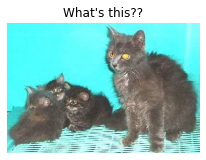

AttributeError: ignored

In [13]:
# 画像を指定する変数
filename = "train/cat.101.jpg"
plt.figure(figsize=(20, 10))
for i in range(1):
  showimg(filename, "What's this??", i+1)
# ループ終わり
plt.show()

# 表示した画像を判定
results = predict( filename, 10 )
for result in results:
  print(result)